In [1]:
# import required libraries for clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
retail = pd.read_excel("Online Retail.xlsx")
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [56]:
retail_TEST = pd.read_excel("Online Retail.xlsx")
retail_TEST.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [42]:
UnitPrice_sum = retail['UnitPrice'].sum()
UnitPrice_sum

1407819.964

In [68]:
Country_unique_count = retail['Country'].nunique()
Country_unique_count

37

In [3]:
CustomerID_unique_count = retail['CustomerID'].nunique()
CustomerID_unique_count

4372

In [4]:
Description_unique_count = retail['Description'].nunique()
Description_unique_count

4223

In [8]:
retail_value_counts = retail['CustomerID'].value_counts()
retail_value_counts

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [7]:
Description_value_counts = retail['Description'].value_counts()
Description_value_counts

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [12]:
# shape of df

retail.shape

(541909, 8)

In [13]:
# df info

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# DATA CLEANING

In [14]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [15]:
# Droping rows having missing values

retail = retail.dropna()
retail.shape

(406829, 8)

In [16]:
# Changing the datatype of Customer Id 

retail['CustomerID'] = retail['CustomerID'].astype(str)

In [17]:
# New Attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [18]:
# New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [19]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [20]:
# New Attribute : Recency

# Convert to datetime to proper datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [21]:
# Compute the maximum date to know the last transaction date

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [22]:
# Compute the difference between max date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [23]:
# Compute recency of customer

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [24]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [25]:
# Merge the dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

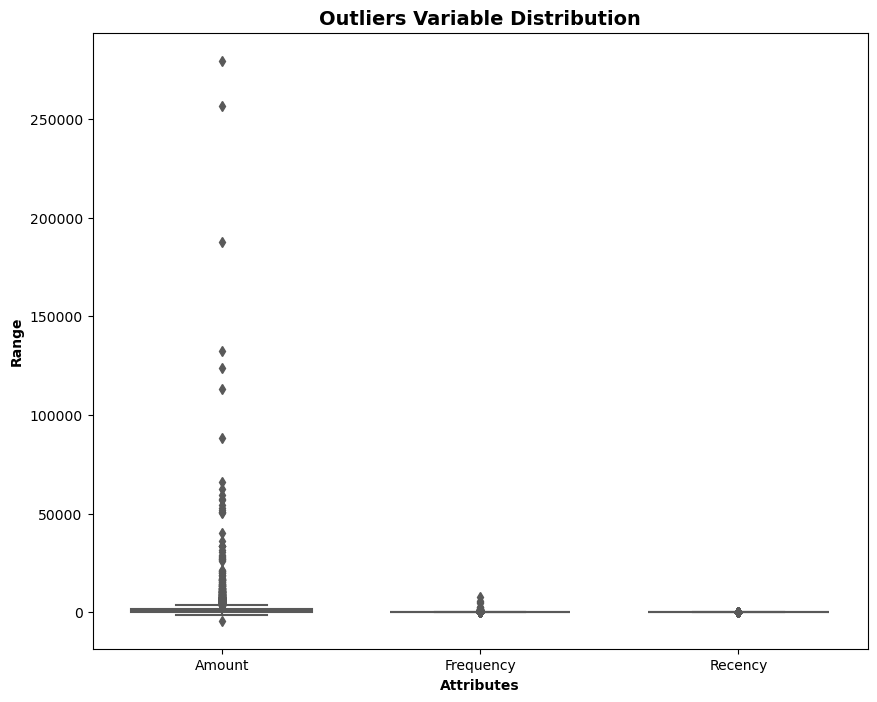

In [26]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [27]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

## Scaling the features 

In [28]:

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [29]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# Model Building

In [30]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [31]:
kmeans.labels_

array([0, 1, 3, ..., 0, 3, 3])

In [32]:
set(kmeans.labels_)

{0, 1, 2, 3}

# Elbow Curve to get the right number of Clusters

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

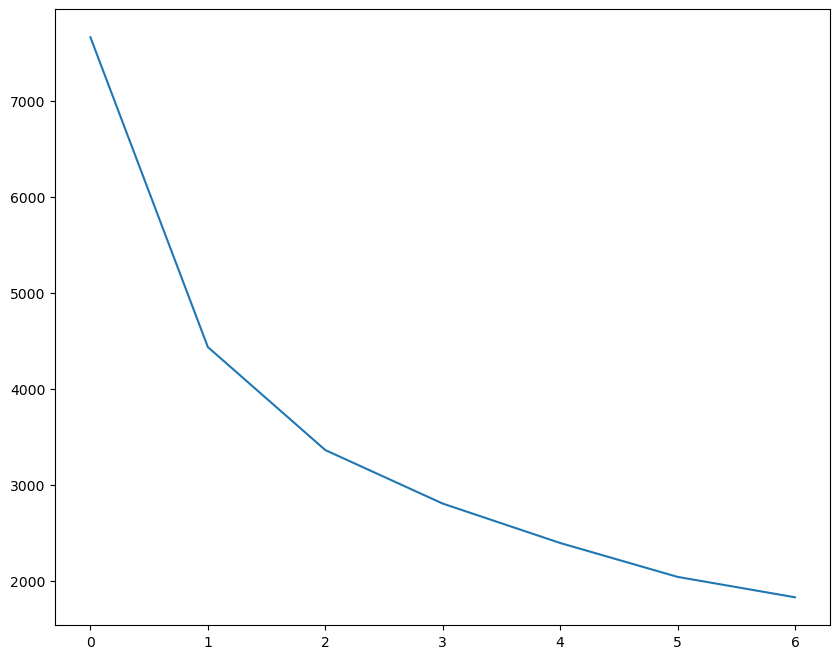

In [33]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [34]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [35]:
 kmeans.labels_

array([0, 1, 2, ..., 0, 2, 2])

In [36]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head(30)

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0
5,12352.0,1545.41,95,35,2
6,12353.0,89.00,4,203,0
7,12354.0,1079.40,58,231,0
8,12355.0,459.40,13,213,0
9,12356.0,2811.43,59,22,2


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

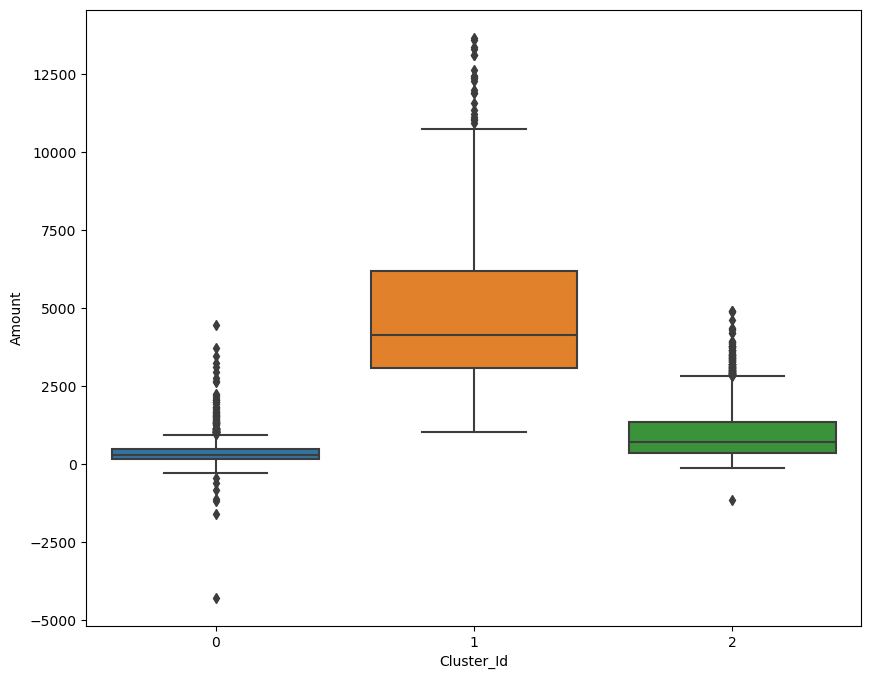

In [37]:
# Box plot to visualize Cluster Id vs Amount

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

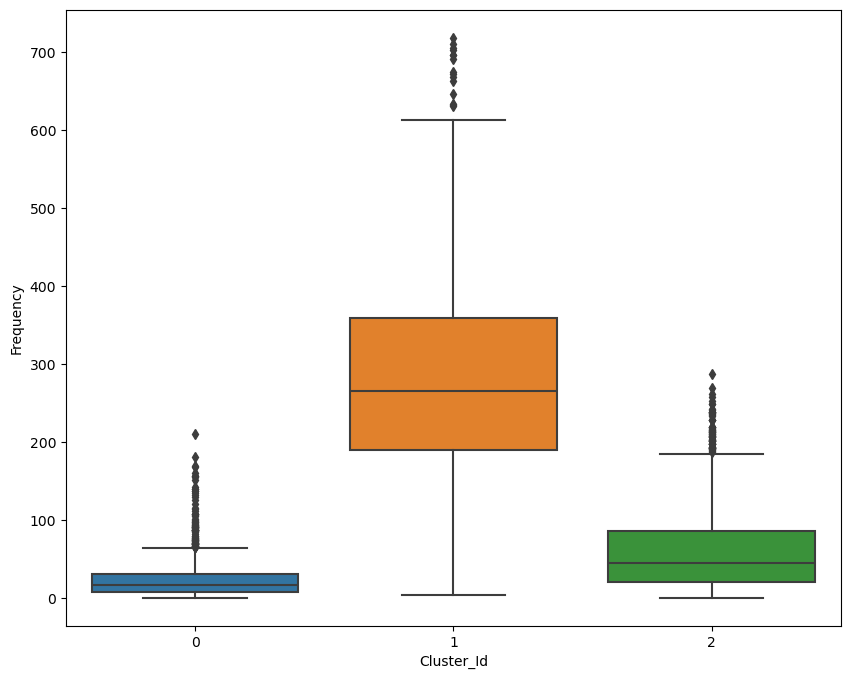

In [38]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

In [49]:
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0


In [50]:
EDA_rfm = rfm
EDA_rfm.head().count()

CustomerID    5
Amount        5
Frequency     5
Recency       5
Cluster_Id    5
dtype: int64

In [46]:
cluster_counts = EDA_rfm.groupby('Cluster_Id').size()
print(cluster_counts)

Cluster_Id
0    1068
1     499
2    2726
dtype: int64


In [55]:
EDA_rfm

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0
...,...,...,...,...,...
4366,18278.0,173.90,9,73,2
4367,18280.0,180.60,10,277,0
4368,18281.0,80.82,7,180,0
4369,18282.0,176.60,13,7,2


In [59]:
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [62]:
EDA_rfm.reset_index(drop=True, inplace=True)
retail_TEST.reset_index(drop=True, inplace=True)

In [65]:
merged_data_cluster = pd.merge(retail, EDA_rfm[['CustomerID', 'Cluster_Id']], on='CustomerID', how='left')
merged_data_cluster.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff,Cluster_Id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,1.0


In [67]:
cluster_0_data = merged_data_cluster[merged_data_cluster['Cluster_Id'] == 0]
cluster_0_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff,Cluster_Id
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,350.40,373 days 03:41:00,0.0
155,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2010-12-01 09:53:00,6.45,18074.0,United Kingdom,19.35,373 days 02:57:00,0.0
156,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2010-12-01 09:53:00,0.65,18074.0,United Kingdom,31.20,373 days 02:57:00,0.0
157,536384,22464,HANGING METAL HEART LANTERN,12,2010-12-01 09:53:00,1.65,18074.0,United Kingdom,19.80,373 days 02:57:00,0.0
158,536384,21324,HANGING MEDINA LANTERN SMALL,6,2010-12-01 09:53:00,2.95,18074.0,United Kingdom,17.70,373 days 02:57:00,0.0


CLUSTER 0


In [100]:
# Find the ten most occurring customers
most_occuring_customers = cluster_0_data['CustomerID'].value_counts().head(10).index

# Initialize a dictionary to store total unit price for each customer
customer_total_unit_price = {}

# Calculate the total unit price for each of the ten most occurring customers
for customer_id in most_occuring_customers:
    customer_data = cluster_0_data[cluster_0_data['CustomerID'] == customer_id]
    total_unit_price = customer_data['UnitPrice'].sum()
    customer_total_unit_price[customer_id] = total_unit_price

# Print the total unit price for each of the ten most occurring customers
for customer_id, total_price in customer_total_unit_price.items():
    print(f"Customer ID: {customer_id}, Total Unit Price: {total_price}")

Customer ID: 15808.0, Total Unit Price: 754.6
Customer ID: 17472.0, Total Unit Price: 372.00999999999993
Customer ID: 14669.0, Total Unit Price: 460.02
Customer ID: 15574.0, Total Unit Price: 422.75
Customer ID: 12501.0, Total Unit Price: 387.32000000000005
Customer ID: 16520.0, Total Unit Price: 433.89
Customer ID: 15464.0, Total Unit Price: 661.11
Customer ID: 14081.0, Total Unit Price: 493.96999999999997
Customer ID: 16725.0, Total Unit Price: 556.0799999999999
Customer ID: 15235.0, Total Unit Price: 427.65


In [101]:
country_counts_0 = cluster_0_data['Country'].value_counts()
country_counts_0

Country
United Kingdom          25002
Germany                   571
France                    328
Belgium                   178
Switzerland               166
Portugal                  123
Italy                     118
Spain                      90
Japan                      83
Unspecified                56
Greece                     54
Austria                    52
Netherlands                49
Lebanon                    45
Australia                  40
Cyprus                     35
Lithuania                  35
Brazil                     32
United Arab Emirates       30
Channel Islands            27
Finland                    22
Sweden                     22
USA                        22
Norway                     17
Bahrain                    17
Canada                     11
Saudi Arabia               10
Israel                      2
Name: count, dtype: int64

In [69]:
UnitPrice_sum_cluster_0 = cluster_0_data['UnitPrice'].sum()
UnitPrice_sum_cluster_0

145800.77099999998

In [70]:
CustomerID_unique_count_cluster_0 = cluster_0_data['CustomerID'].nunique()
CustomerID_unique_count_cluster_0

1068

In [71]:

Description_unique_count_cluster_0 = cluster_0_data['Description'].nunique()
Description_unique_count_cluster_0

2841

In [76]:

retail_value_counts_cluster_0 = cluster_0_data['CustomerID'].value_counts()
retail_value_counts_cluster_0.head(10)

CustomerID
15808.0    210
17472.0    181
14669.0    170
15574.0    168
12501.0    160
16520.0    157
15464.0    157
14081.0    156
16725.0    152
15235.0    143
Name: count, dtype: int64

In [73]:
Country_unique_count_cluster_0 = cluster_0_data['Country'].nunique()
Country_unique_count_cluster_0

28

In [75]:

Description_value_counts_cluster_0 = cluster_0_data['Description'].value_counts()
Description_value_counts_cluster_0.head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    200
REGENCY CAKESTAND 3 TIER              188
PARTY BUNTING                         142
ASSORTED COLOUR BIRD ORNAMENT         118
REX CASH+CARRY JUMBO SHOPPER          117
NATURAL SLATE HEART CHALKBOARD        104
JAM MAKING SET WITH JARS              102
SET OF 3 CAKE TINS PANTRY DESIGN       98
PACK OF 72 RETROSPOT CAKE CASES        91
HEART OF WICKER SMALL                  91
Name: count, dtype: int64

CLUSTER 1


In [77]:
cluster_1_data = merged_data_cluster[merged_data_cluster['Cluster_Id'] == 1]
cluster_1_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff,Cluster_Id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,1.0


In [97]:
# Find the ten most occurring customers
most_occuring_customers = cluster_1_data['CustomerID'].value_counts().head(10).index

# Initialize a dictionary to store total unit price for each customer
customer_total_unit_price = {}

# Calculate the total unit price for each of the ten most occurring customers
for customer_id in most_occuring_customers:
    customer_data = cluster_1_data[cluster_1_data['CustomerID'] == customer_id]
    total_unit_price = customer_data['UnitPrice'].sum()
    customer_total_unit_price[customer_id] = total_unit_price

# Print the total unit price for each of the ten most occurring customers
for customer_id, total_price in customer_total_unit_price.items():
    print(f"Customer ID: {customer_id}, Total Unit Price: {total_price}")

Customer ID: 16764.0, Total Unit Price: 1708.62
Customer ID: 16904.0, Total Unit Price: 1950.2599999999998
Customer ID: 13137.0, Total Unit Price: 1393.6599999999999
Customer ID: 15547.0, Total Unit Price: 1827.52
Customer ID: 17920.0, Total Unit Price: 1623.75
Customer ID: 16923.0, Total Unit Price: 2161.05
Customer ID: 17735.0, Total Unit Price: 1512.8000000000002
Customer ID: 15529.0, Total Unit Price: 1160.59
Customer ID: 16360.0, Total Unit Price: 1571.5299999999997
Customer ID: 16729.0, Total Unit Price: 1559.1


In [102]:
country_counts_1 = cluster_1_data['Country'].value_counts()
country_counts_1

Country
United Kingdom     126014
Germany              5519
France               4752
Spain                1522
Switzerland          1046
Norway                705
Belgium               694
Portugal              687
Cyprus                413
Channel Islands       366
Finland               300
Singapore             229
Australia             186
Iceland               182
Israel                171
EIRE                  162
Poland                159
Denmark                36
Japan                   8
Austria                 8
Name: count, dtype: int64

In [78]:
UnitPrice_sum_cluster_1 = cluster_1_data['UnitPrice'].sum()
UnitPrice_sum_cluster_1

473901.54000000004

In [79]:
CustomerID_unique_count_cluster_1 = cluster_1_data['CustomerID'].nunique()
CustomerID_unique_count_cluster_1

499

In [80]:

Description_unique_count_cluster_1 = cluster_1_data['Description'].nunique()
Description_unique_count_cluster_1

3493

In [84]:

retail_value_counts_cluster_1 = cluster_1_data['CustomerID'].value_counts()
retail_value_counts_cluster_1.head(10)

CustomerID
16764.0    718
16904.0    710
13137.0    705
15547.0    702
17920.0    696
16923.0    696
17735.0    690
15529.0    674
16360.0    671
16729.0    668
Name: count, dtype: int64

In [85]:
Country_unique_count_cluster_1 = cluster_1_data['Country'].nunique()
Country_unique_count_cluster_1

20

In [86]:

Description_value_counts_cluster_1 = cluster_1_data['Description'].value_counts()
Description_value_counts_cluster_1.head(10)

Description
JUMBO BAG RED RETROSPOT               691
WHITE HANGING HEART T-LIGHT HOLDER    634
LUNCH BAG RED RETROSPOT               602
REGENCY CAKESTAND 3 TIER              602
ASSORTED COLOUR BIRD ORNAMENT         512
PARTY BUNTING                         505
LUNCH BAG  BLACK SKULL.               474
LUNCH BAG SUKI DESIGN                 460
ALARM CLOCK BAKELIKE RED              441
POSTAGE                               437
Name: count, dtype: int64

CLUSTER 2


In [87]:
cluster_2_data = merged_data_cluster[merged_data_cluster['Cluster_Id'] == 2]
cluster_2_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff,Cluster_Id
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,204.0,373 days 03:50:00,2.0
105,536380,22961,JAM MAKING SET PRINTED,24,2010-12-01 09:41:00,1.45,17809.0,United Kingdom,34.8,373 days 03:09:00,2.0
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098.0,United Kingdom,10.2,373 days 03:05:00,2.0
143,536382,21912,VINTAGE SNAKES & LADDERS,8,2010-12-01 09:45:00,3.75,16098.0,United Kingdom,30.0,373 days 03:05:00,2.0
144,536382,21832,CHOCOLATE CALCULATOR,12,2010-12-01 09:45:00,1.65,16098.0,United Kingdom,19.8,373 days 03:05:00,2.0


In [96]:
# Find the ten most occurring customers
most_occuring_customers = cluster_2_data['CustomerID'].value_counts().head(10).index

# Initialize a dictionary to store total unit price for each customer
customer_total_unit_price = {}

# Calculate the total unit price for each of the ten most occurring customers
for customer_id in most_occuring_customers:
    customer_data = cluster_2_data[cluster_2_data['CustomerID'] == customer_id]
    total_unit_price = customer_data['UnitPrice'].sum()
    customer_total_unit_price[customer_id] = total_unit_price

# Print the total unit price for each of the ten most occurring customers
for customer_id, total_price in customer_total_unit_price.items():
    print(f"Customer ID: {customer_id}, Total Unit Price: {total_price}")

Customer ID: 14410.0, Total Unit Price: 714.6999999999998
Customer ID: 16728.0, Total Unit Price: 619.95
Customer ID: 17126.0, Total Unit Price: 495.34000000000003
Customer ID: 14449.0, Total Unit Price: 427.65999999999997
Customer ID: 17372.0, Total Unit Price: 588.6299999999999
Customer ID: 15907.0, Total Unit Price: 644.97
Customer ID: 17961.0, Total Unit Price: 814.79
Customer ID: 16744.0, Total Unit Price: 604.6600000000001
Customer ID: 14573.0, Total Unit Price: 1091.4900000000002
Customer ID: 15059.0, Total Unit Price: 754.7700000000001


In [107]:
country_counts_2 = cluster_2_data['Country'].value_counts()
country_counts_2

Country
United Kingdom          148262
France                    2967
Germany                   2874
Belgium                   1197
Spain                      921
Italy                      685
Portugal                   670
Switzerland                665
Finland                    373
Channel Islands            365
Norway                     364
Denmark                    353
Austria                    341
USA                        269
Australia                  255
Sweden                     239
Netherlands                237
Unspecified                188
Poland                     182
Cyprus                     174
Canada                     140
Malta                      127
Greece                      92
Israel                      77
European Community          61
RSA                         58
United Arab Emirates        38
Japan                       37
Czech Republic              30
Name: count, dtype: int64

In [88]:
UnitPrice_sum_cluster_2 = cluster_2_data['UnitPrice'].sum()
UnitPrice_sum_cluster_2

509386.1729999999

In [89]:
CustomerID_unique_count_cluster_2 = cluster_2_data['CustomerID'].nunique()
CustomerID_unique_count_cluster_2

2726

In [90]:

Description_unique_count_cluster_2 = cluster_2_data['Description'].nunique()
Description_unique_count_cluster_2

3582

In [91]:

retail_value_counts_cluster_2 = cluster_2_data['CustomerID'].value_counts()
retail_value_counts_cluster_2.head(10)

CustomerID
14410.0    287
16728.0    269
17126.0    262
14449.0    258
17372.0    253
15907.0    249
17961.0    249
16744.0    242
14573.0    241
15059.0    239
Name: count, dtype: int64

In [92]:
Country_unique_count_cluster_2 = cluster_2_data['Country'].nunique()
Country_unique_count_cluster_2

29

In [93]:

Description_value_counts_cluster_2 = cluster_2_data['Description'].value_counts()
Description_value_counts_cluster_2.head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    866
REGENCY CAKESTAND 3 TIER              768
ASSORTED COLOUR BIRD ORNAMENT         660
POSTAGE                               610
PARTY BUNTING                         556
JUMBO BAG RED RETROSPOT               555
PAPER CHAIN KIT 50'S CHRISTMAS        525
SET OF 3 CAKE TINS PANTRY DESIGN      505
REX CASH+CARRY JUMBO SHOPPER          482
NATURAL SLATE HEART CHALKBOARD        467
Name: count, dtype: int64